### Test_MBPLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mbpls.mbpls import MBPLS
import sklearn

In [2]:
# Upload the raman data
raman_data = pd.read_csv("./Data/prepa_raman_data.csv", sep = ',', decimal = '.', na_values ='NaN')
raman_data = raman_data.rename(columns={'Group.1':'Strain'})
raman_data

,Strain,X600,X601,X602,X603,X604,X605,X606,X607,X608,...,X1612,X1613,X1614,X1615,X1616,X1617,X1618,X1619,X1620,X1621
0,AMK,0.005259,0.005296,0.005315,0.005542,0.005840,0.006171,0.006269,0.005919,0.005488,...,0.014231,0.012647,0.011288,0.009718,0.007902,0.006070,0.004513,0.003410,0.000605,0.001054
1,AZM,0.006840,0.006824,0.006840,0.006983,0.007281,0.007867,0.008063,0.007401,0.006613,...,0.014516,0.012216,0.010650,0.009563,0.007857,0.006084,0.004479,0.003528,0.000739,0.001001
2,CFIX,0.009100,0.008903,0.009184,0.009542,0.009756,0.010177,0.010319,0.009574,0.008640,...,0.012331,0.010492,0.010190,0.008663,0.007005,0.005463,0.004089,0.003895,0.002260,0.002654
3,CP,0.008013,0.007944,0.007480,0.007366,0.008054,0.008955,0.008982,0.008253,0.007808,...,0.014886,0.014067,0.013045,0.011687,0.009937,0.007799,0.006600,0.005745,0.002461,0.002330
4,CPFX,0.010620,0.010711,0.010749,0.010607,0.010688,0.011532,0.012174,0.011604,0.010707,...,0.013826,0.012061,0.010094,0.009491,0.008382,0.006529,0.004964,0.003940,0.001934,0.001949
5,CPZ,0.006986,0.007075,0.006909,0.006665,0.006665,0.007290,0.007439,0.006640,0.006137,...,0.013590,0.012095,0.010938,0.010044,0.008698,0.007115,0.005234,0.003934,0.001022,0.001022
6,DOXY,0.007112,0.007595,0.007799,0.007763,0.007995,0.009068,0.009379,0.007883,0.007184,...,0.015197,0.013346,0.011674,0.010482,0.008917,0.007376,0.005607,0.004532,0.001942,0.002279
7,ENX,0.012209,0.012505,0.012112,0.011615,0.012167,0.013151,0.013239,0.012240,0.010875,...,0.014529,0.012708,0.009622,0.009410,0.008769,0.006076,0.004596,0.003763,0.003025,0.003206
8,MDS42,0.006704,0.006534,0.006542,0.006787,0.007263,0.007658,0.007573,0.007169,0.006745,...,0.014651,0.012975,0.011707,0.010298,0.008442,0.006646,0.005086,0.003817,0.000846,0.000847
9,NM,0.007440,0.007596,0.007948,0.008449,0.008910,0.009464,0.009153,0.008386,0.008298,...,0.011365,0.010148,0.008970,0.007324,0.006025,0.004747,0.003702,0.002716,0.001587,0.001376


In [4]:
# Upload the expression of gene data
gene_data = pd.read_csv("./Data/expr_gene.csv", sep = ',', decimal=",", na_values ='NaN')
gene_data

,Strain,aaeR,aaeX,aas,aat,accA,accB,accC,accD,aceA,...,zapA,zipA,zitB,zntR,znuA,znuB,znuC,zraR,zur,zwf
0,AMK,2.599837,2.629212,2.600993,2.788213,3.710908,3.961528,3.750354,3.583595,4.227386,...,3.842389,3.094845,2.226833,3.002346,4.847445,3.510314,3.543775,2.341284,2.703667,3.434559
1,AZM,2.565154,2.504271,2.677717,2.810473,3.854184,3.908912,3.763894,3.547494,3.914692,...,3.871238,3.254139,2.200380,2.767508,4.847445,3.536960,3.526394,2.338850,2.683176,3.472001
2,CFIX,2.418932,2.353282,2.533941,2.764200,3.998843,3.959466,3.689474,3.564220,3.583595,...,3.895940,3.261629,2.357512,3.044810,4.508457,3.381155,3.370883,2.189059,2.820295,3.499746
3,CP,2.502467,2.344115,2.600993,2.771472,3.754655,3.872780,3.693677,3.551469,3.794520,...,3.913465,3.282607,2.641243,2.943809,4.898900,3.346315,3.326794,2.381683,2.612927,4.129672
4,CPFX,2.703667,2.662316,2.476045,2.739008,3.806450,3.987978,3.846669,3.617581,3.518206,...,3.899047,3.310141,2.269114,2.759620,4.801326,3.724972,3.699396,2.366475,2.716696,3.894231
5,CPZ,2.407271,2.307116,2.446479,2.848310,3.746616,3.894231,3.696276,3.575670,3.876755,...,4.001067,3.109410,2.356846,2.974960,4.865212,3.457613,3.447666,2.279767,2.518941,3.569531
6,DOXY,2.735470,2.475420,2.511782,2.768958,3.811912,3.920060,3.775610,3.610119,4.144128,...,4.037058,3.256363,2.546581,2.899562,3.400484,2.646542,2.617157,2.278298,2.531478,3.601352
7,ENX,2.685474,2.499486,2.529878,2.688036,3.642901,3.802497,3.599166,3.364622,4.108814,...,3.803744,3.489247,2.470521,2.903007,4.749295,3.673247,3.694775,2.337350,2.636612,3.345634
8,MDS42,2.513952,2.405916,2.627792,2.870301,3.799950,3.991433,3.826301,3.594045,3.793262,...,3.806450,3.177236,2.267448,2.774308,4.829088,3.516191,3.466339,2.385871,2.587285,3.611548
9,NM,2.606394,2.548090,2.554642,2.849003,3.881219,3.978144,3.813299,3.708296,3.692448,...,3.961528,3.224236,2.373450,2.865010,4.898900,3.482608,3.428463,2.386574,2.591520,3.555252


In [5]:
#name_cell = gene_data.index #les noms des bactéries
#wavenumbers = raman_data.columns #les longueurs d'ondes raman

# The 2 data matrices X1 and X2 (two blocks)
x1 = raman_data
x1.Strain.replace(['AMK','AZM','CFIX','CP','CPFX','CPZ','DOXY','ENX','MDS42','NM','TP'],[1,2,3,4,5,6,7,8,9,10,11],inplace = True)
x1 = x1.set_index('Strain')
x1.index.name = None


x2 = gene_data #les données d'expression de gènes
x2.Strain.replace(['AMK','AZM','CFIX','CP','CPFX','CPZ','DOXY','ENX','MDS42','NM','TP'],[1,2,3,4,5,6,7,8,9,10,11],inplace = True)
x2 = x2.set_index('Strain')
x2.index.name = None

# Generate vector y
x2.index = x1.index
y = np.array(x2.index)
wavenumbers = x1.columns


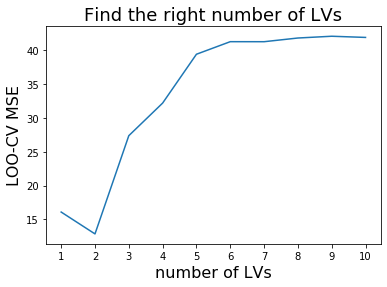

In [6]:
from mbpls.mbpls import MBPLS
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

MSEs = []
for lv in range(10):
    mbpls = MBPLS(n_components=lv+1)
    prediction = cross_val_predict(mbpls, x1, y, cv=len(x1))
    prediction = pd.DataFrame(prediction)
    MSEs.append(mean_squared_error(prediction, y))

plt.plot(np.arange(1,11), MSEs)
plt.xlabel('number of LVs', fontsize=16)
plt.xticks(np.arange(1,11), np.arange(1,11))
plt.ylabel('LOO-CV MSE', fontsize=16)
plt.title('Find the right number of LVs', fontsize=18);

1 [[  6.05857645]
 [  4.41533658]
 [  3.39690817]
 [  7.82361386]
 [  9.62477646]
 [  4.19655045]
 [  5.90469678]
 [  3.42554047]
 [  5.67178818]
 [ 11.21184462]
 [  5.0093481 ]]
2
            0   0
0    6.058576   1
1    4.415337   2
2    3.396908   3
3    7.823614   4
4    9.624776   5
5    4.196550   6
6    5.904697   7
7    3.425540   8
8    5.671788   9
9   11.211845  10
10   5.009348  11
Int64Index([0, 0], dtype='int64')


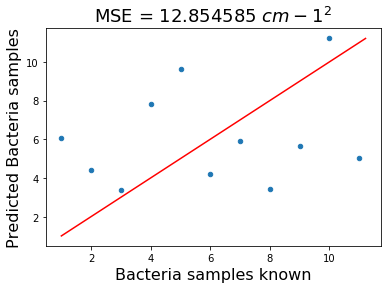

In [7]:
from mbpls.mbpls import MBPLS
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

mbpls = MBPLS(n_components=2)
prediction = cross_val_predict(mbpls, x1, y, cv=len(x1))

print("1",prediction)

prediction = pd.DataFrame(prediction)
y = pd.DataFrame(y)
prediction = pd.concat((prediction, y), axis=1)

print("2")

print(prediction)
print(prediction.columns)
prediction.columns=['Predicted Bacteria samples', 'Bacteria samples known']
prediction.plot.scatter(x='Bacteria samples known', y='Predicted Bacteria samples')
plt.plot([prediction.min().min(), prediction.max().max()],
         [prediction.min().min(), prediction.max().max()], color='red')
plt.ylabel(prediction.columns[0], fontsize=16)
plt.xlabel(prediction.columns[1], fontsize=16)
plt.title('MSE = {:.6f} $cm-1^2$'.format(mean_squared_error(prediction['Bacteria samples known'],
                                    prediction['Predicted Bacteria samples'])), fontsize=18);

(11, 1022) (11, 2613) (11, 1)


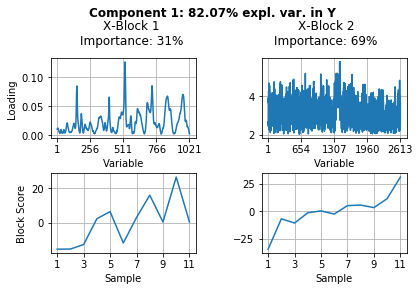

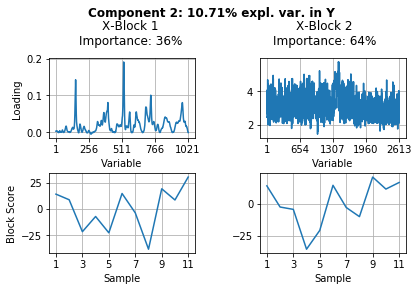

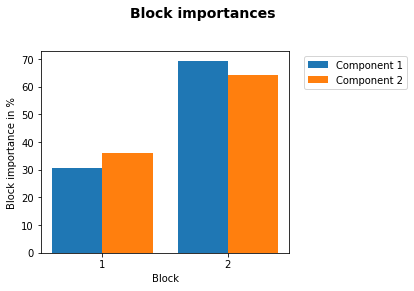

In [8]:
# Establish prediction model using 3 latent variables (components)
mbpls = MBPLS(n_components=2)
mbpls.fit([x1, x2],y)
y_pred = mbpls.predict([x1, x2])

# Use built-in plot method for exploratory analysis of multiblock pls models
print(x1.shape,x2.shape,y.shape)
mbpls.plot(num_components=2)

In [9]:
print('The Block Importances [%] in each latent variable are:')
BIP = pd.DataFrame(mbpls.A_.round(2), columns=['LV1', 'LV2'],
                   index=['Raman data', 'Gene expression'])
BIP

The Block Importances [%] in each latent variable are:


,LV1,LV2
Raman data,0.31,0.36
Gene expression,0.69,0.64


In [10]:
print('The corrected Block Importances [%] in each latent variable are:')
BIP_corrected = pd.DataFrame(mbpls.A_corrected_.round(2),
                columns=['LV1', 'LV2'], index=['Raman', 'Gene expression'])
BIP_corrected

The corrected Block Importances [%] in each latent variable are:


,LV1,LV2
Raman,0.53,0.59
Gene expression,0.47,0.41


block [[-15.31360653  13.97884047]
 [-15.23589562   8.60814682]
 [-12.60902265 -21.94138878]
 [  2.28116129  -7.40383526]
 [  6.40881134 -23.01453596]
 [-11.7050849   14.59438151]
 [  3.02220284  -3.95122433]
 [ 15.90474937 -38.67939296]
 [  0.3928621   19.10366071]
 [ 26.39492988   8.39019946]
 [  0.45889288  30.31514832]]


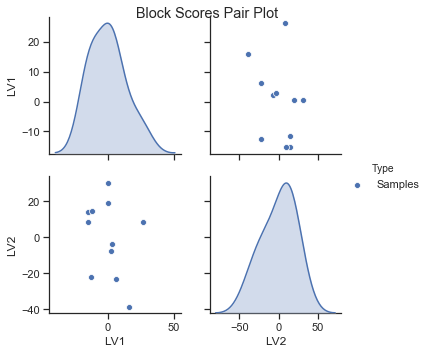

In [11]:
# extract RAMAN (X1) block scores from fitted mbpls model
block_scores_x1 = mbpls.T_[0]

# extract RAMAN (X1) loadings from fitted mbpls model
block_loadings_x1 = mbpls.P_[0].T

print('block',block_scores_x1)

# inverse transform loadings if standardize option was used during fitting
# (by default)
block_loadings_x1 = np.hstack([mbpls.x_scalers_[0].inverse_transform(loading)
                            .reshape(-1, 1) for loading in block_loadings_x1])

# Generate a vector which indicates color type for each sample
import itertools
colors = [['Samples']*11]
colors = list(itertools.chain(*colors))
colors = pd.DataFrame(colors, columns=['Type'])

# Generate pandas dataframes for easy plotting using seaborn
block_scores_x1 = pd.DataFrame(block_scores_x1, columns=['LV1', 'LV2'])
block_scores_x1 = pd.concat((block_scores_x1, colors), axis=1)
block_loadings_x1 = pd.DataFrame(block_loadings_x1,
                            columns=['LV1', 'LV2'], index=wavenumbers)

# Plot block scores using pairs plot
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(block_scores_x1, hue="Type")
plt.suptitle('Block Scores Pair Plot')
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")

# Plot FTIR (X1) loadings
sns.lineplot(data=block_loadings_x1, palette="tab10", linewidth=2.5)
plt.title('Block Loadings $X_1$', fontsize=18)
plt.xlabel('wavenumbers [$cm^{-1}$]', fontsize=16);

# Plot function to plot FTIR spectra and color them according extraction
# yield
def plot_spectra(spectra, ax, name):
    bacteria = np.array(spectra.index)
    color_code = (bacteria - bacteria.min())
    color_code = color_code / color_code.max()
    color_code = color_code[:]
    for spectrum, color in zip(np.array(spectra), color_code):
        ax.plot(wavenumbers, spectrum, color=(color, color, color),
                linewidth=2)
        ax.set_title(name, fontsize=18)
        ax.set_xlabel('wavenumber $cm^{-1}$', fontsize=16)
        plt.tight_layout()

# Plot FTIR spectra in groups of extractions for explorative data
# analysis
fig, ax = plt.subplots(figsize=(8,5))
plot_spectra(x1, ax, 'Spectrum of raman data ($X_1$)')

In [ ]:
print(x2.shape)

(11, 2613)


block [[-34.65315506  13.90373148]
 [ -6.98286091  -2.66259549]
 [-10.80845471  -4.50100969]
 [ -1.49460558 -35.67300062]
 [  0.25441857 -20.93751922]
 [ -2.64101883  14.34306716]
 [  5.04860456  -3.02917699]
 [  5.55832037 -10.17777819]
 [  3.24801797  20.79524789]
 [ 11.3815222   11.39472032]
 [ 31.08921142  16.54431335]]


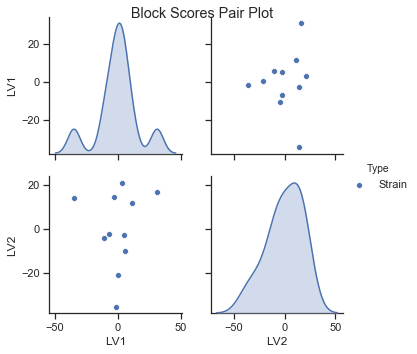

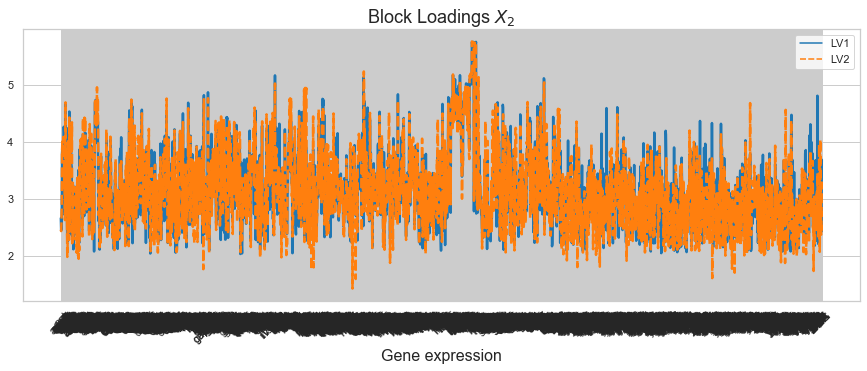

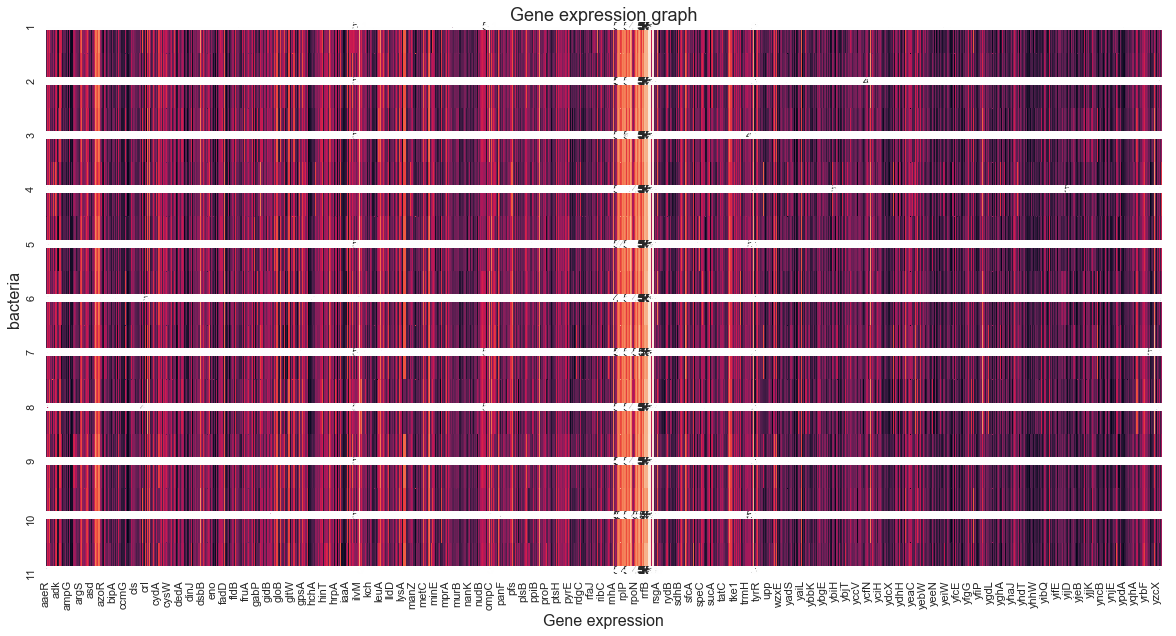

In [ ]:
# extract gene expression (X2) block scores from fitted mbpls model
block_scores_x2 = mbpls.T_[1]

# extract gene expression (X2) loadings from fitted mbpls model
block_loadings_x2 = mbpls.P_[1].T

print('block',block_scores_x2)

# inverse transform loadings if standardize option was used during fitting
# (by default)
block_loadings_x2 = np.hstack([mbpls.x_scalers_[1].inverse_transform(loading)
                            .reshape(-1, 1) for loading in block_loadings_x2])

# Generate pandas dataframes for easy plotting using seaborn
import itertools
colors = [['Strain']*11]
colors = list(itertools.chain(*colors))
colors = pd.DataFrame(colors, columns=['Type'])

block_scores_x2 = pd.DataFrame(block_scores_x2, columns=['LV1', 'LV2'])
block_scores_x2 = pd.concat((block_scores_x2, colors), axis=1)
block_loadings_x2 = pd.DataFrame(block_loadings_x2,
                            columns=['LV1', 'LV2'], index=x2.columns)

# Plot block scores using pairs plot
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(block_scores_x2, hue="Type")
plt.suptitle('Block Scores Pair Plot')

# Plot gene expression (X2) loadings
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.lineplot(data=block_loadings_x2, palette="tab10", linewidth=2.5,
             sort=False)
plt.xticks(rotation=45)
plt.title('Block Loadings $X_2$', fontsize=18)
plt.xlabel('Gene expression', fontsize=16);

# Plot gene expression data for comparison and exploratory data analysis
plt.figure(figsize=(20,10))
sns.heatmap(x2, annot=True, cbar=False)
plt.title('Gene expression graph', fontsize=18)
plt.xlabel('Gene expression', fontsize=16)
plt.ylabel('bacteria', fontsize=16);